### Unstructured Data Analysis – Assignment 2

In [50]:
.libPaths("/home/rstudio/R/x86_64-pc-linux-gnu-library/3.4")

In [51]:
library(tm)
library(stringr)
library(stringi)
library(tm)
library(wordcloud)
library(dplyr)
library(plyr)
library(ggplot2)
library(RColorBrewer)

In [52]:
modi_tweets <- read.csv("narendramodi_tweets.csv", header = TRUE)
modi_tweets$text <- as.character(modi_tweets$text)

In [53]:
head(modi_tweets$text)
hastags.words <- list()

[1] "The President's address wonderfully encapsulated India's strengths, aspirations, potential &amp; the efforts towards #TransformingIndia."
[2] "Rashtrapati Ji's address to both Houses of Parliament was in-depth &amp; extensive. Do hear. https://t.co/rdKQtjgNNx @RashtrapatiBhvn"   
[3] "RT @PMOIndia: Empowering the marginalised. https://t.co/wwsqgW94Dk"                                                                      
[4] "RT @PMOIndia: Commitment to welfare of farmers. https://t.co/P7AAfRfmrC"                                                                 
[5] "RT @PMOIndia: Improving the quality of life for the poor. https://t.co/8ugm25VK2Z"                                                       
[6] "RT @PMOIndia: Financial inclusion for poverty alleviation. https://t.co/5xT2ZyhHTE"

In [54]:
hastags.words <-  lapply(modi_tweets$text, function(x){
    splitx <- strsplit(x, " ")[[1]]
    words <- NULL
    for (i in 1:length(splitx)) {
        if (substring(splitx[i],1,1) == '#') {
            words[i] <- substring(splitx[i],2)
        }
    }
    words
})

In [55]:
df.hashtags.words <- as.data.frame(na.omit(unlist(hastags.words)))
colnames(df.hashtags.words) <- "words"

In [56]:
df.hashtags.words$words_tags <- gsub(df.hashtags.words$words, pattern = "[.]", replacement = "")
df.hashtags.words$words_tags <- gsub(df.hashtags.words$words, pattern = "[^[:alnum:]]", replacement = NA)

In [57]:
df.words_tags <- as.data.frame(table(na.omit(df.hashtags.words$words_tags)))
colnames(df.words_tags) <- c("hashtags", "Freq")

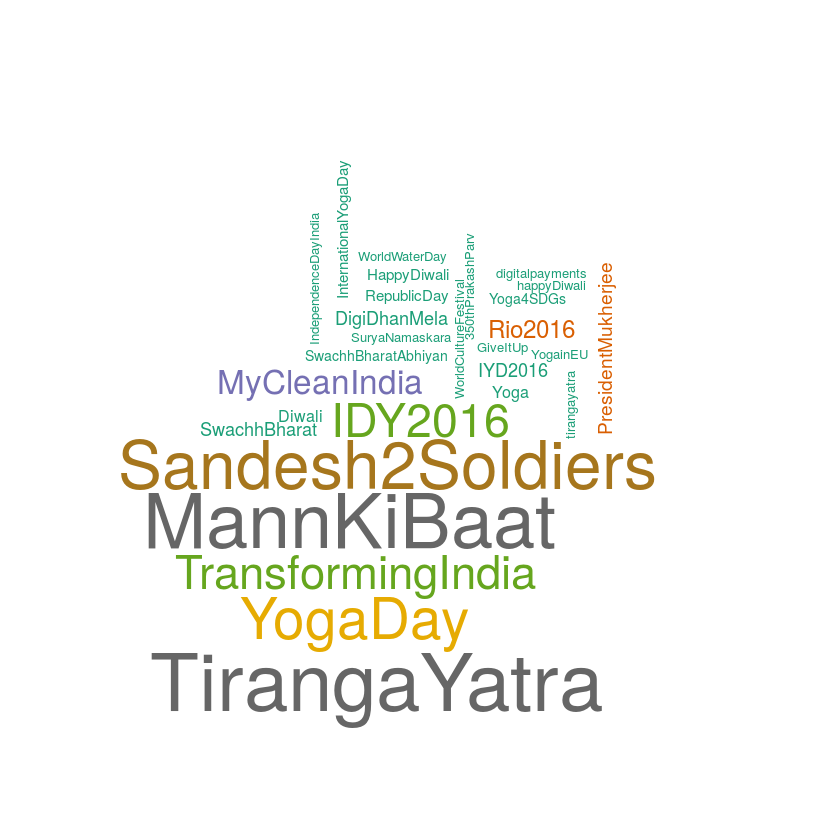

In [58]:
wordcloud(df.words_tags$hashtags, df.words_tags$Freq, colors = brewer.pal(8,"Dark2"))

### b. For each quarter identify top 5 hashtags based on frequency. Represent them using bar charts (Tip: use facets)

In [59]:
date_time <- as.data.frame(ldply(strsplit(as.character(modi_tweets$created), " ")))

In [60]:
Qtags <- function(tweets_text, q){
    hastags.words <-  lapply(tweets_text, function(x){
        splitx <- strsplit(x, " ")[[1]]
        words <- NULL
        for (i in 1:length(splitx)) {
            if (substring(splitx[i],1,1) == '#') {
                words[i] <- substring(splitx[i],2)
            }
        }
        words
    })
    df.hashtags.words <- as.data.frame(na.omit(unlist(hastags.words)))
    colnames(df.hashtags.words) <- "words"
    df.hashtags.words$words_tags <- gsub(df.hashtags.words$words, pattern = "[.]", replacement = "")
    df.hashtags.words$words_tags <- gsub(df.hashtags.words$words, pattern = "[^[:alnum:]]", 
                                       replacement = NA)
    df.words_tags <- as.data.frame(table(na.omit(df.hashtags.words$words_tags)))
    df.words_tags$quarter <- q

    return(head(df.words_tags[order(-df.words_tags$Freq),],5))
}

### Extract Month and Year from date

In [61]:
modi_tweets$Month <- strftime(as.POSIXct(date_time$V1), format = "%Y-%m")
modi_tweets$Month <- as.character(modi_tweets$Month)
top5hashtags <-rbind( 
    Qtags(modi_tweets[which(modi_tweets$Month == '2016-03'),]$text, "Q1"),
    Qtags(modi_tweets[which(modi_tweets$Month %in% c('2016-04', '2016-05', '2016-06')),]$text, "Q2"),
    Qtags(modi_tweets[which(modi_tweets$Month %in% c('2016-07', '2016-08', '2016-09')),]$text, "Q3"),
    Qtags(modi_tweets[which(modi_tweets$Month %in% c('2016-10', '2016-11', '2016-12')),]$text, "Q4")
)
colnames(top5hashtags) <- c("Words", "Freq", "Quarter")

### Plotting Barchart using facet grid:

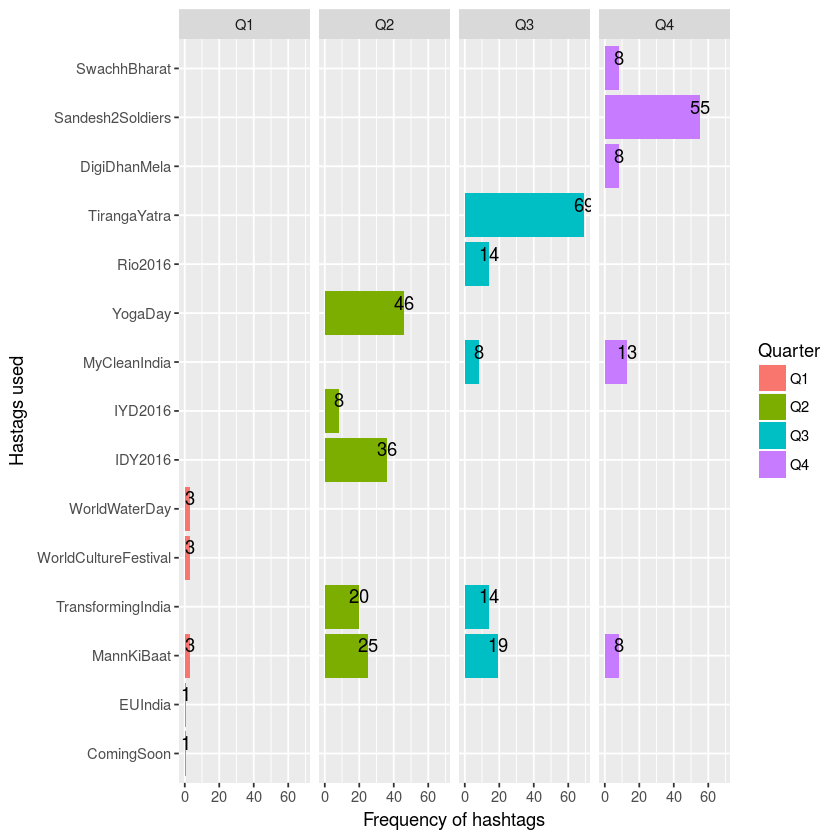

In [62]:
ggplot(data =  top5hashtags,  aes(x = Words, y = Freq, fill = Quarter)) + geom_bar(stat = "identity") + facet_grid(. ~Quarter) + coord_flip() + geom_text(aes(label=Freq), position=position_dodge(width=0.9), vjust=-.25) + labs(x="Hastags used", y="Frequency of hashtags")

In [63]:
november_tweets <- modi_tweets[which(modi_tweets$Month == '2016-11'),]
november_tweets$text_letters <- lapply(november_tweets$text,                     
function(x){
  if (substring(x,1,2) == 'RT') {
    return(nchar(substring(x,2)))
  }
  else {
    return(nchar(x))
  }
})

### Plotting the bubble chart ..

Don't know how to automatically pick scale for object of type list. Defaulting to continuous.


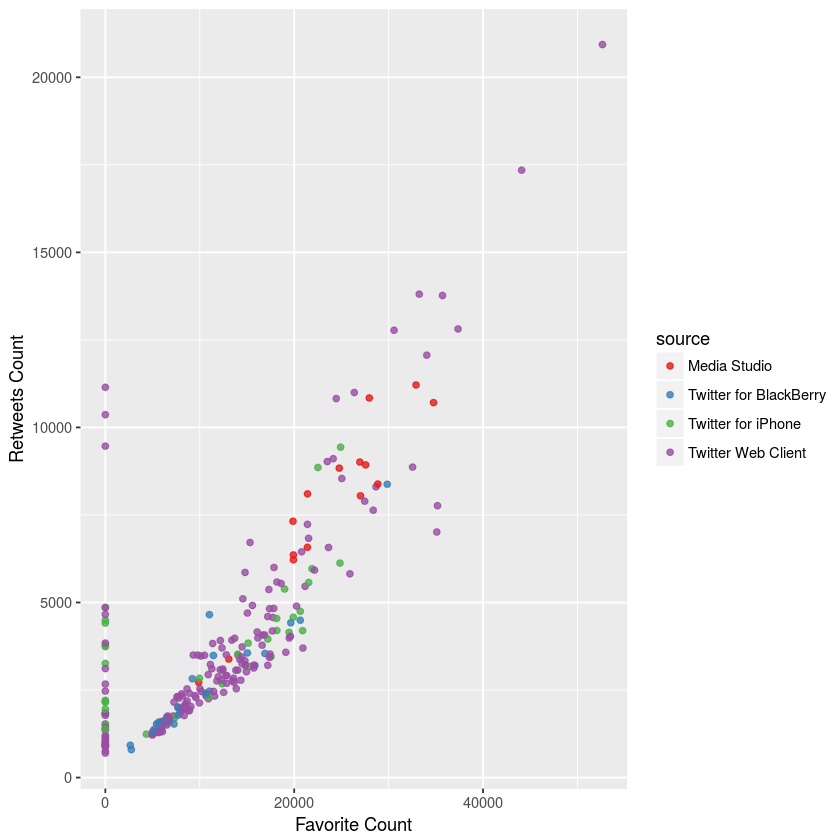

In [64]:
ggplot(november_tweets, aes(x = favorite_count, y = retweets_count, color = source, size = text_letters)) +
          geom_point(alpha = 0.8) + scale_color_brewer(palette = 'Set1') + 
          labs(x="Favorite Count", y="Retweets Count")

### b. Use text mining package to create a word cloud for modi's tweet. While applying mapping, use SnowballC package to apply stemming.

In [65]:
library(tm)
library(SnowballC)

In [66]:
modi_tweets$text_clear <- gsub("[^A-Za-z///' ]", "", modi_tweets$text)
modi_tweets$text_clear <- as.character(modi_tweets$text_clear)
modi.tweets.corpus <- Corpus(VectorSource(modi_tweets$text_clear))
inspect(modi.tweets.corpus)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 3220

   [1] The President's address wonderfully encapsulated India's strengths aspirations potential amp the efforts towards TransformingIndia                  
   [2] Rashtrapati Ji's address to both Houses of Parliament was indepth amp extensive Do hear https//tco/rdKQtjgNNx RashtrapatiBhvn                       
   [3] RT PMOIndia Empowering the marginalised https//tco/wwsqgWDk                                                                                         
   [4] RT PMOIndia Commitment to welfare of farmers https//tco/PAAfRfmrC                                                                                   
   [5] RT PMOIndia Improving the quality of life for the poor https//tco/ugmVKZ                                                                            
   [6] RT PMOIndia Financial inclusion for poverty alleviation https//tco/xTZyhHTE                                   

In [67]:
modi.tweets.corpus <- tm_map(modi.tweets.corpus, content_transformer(tolower))
all_stop_words = c(stopwords(), "https")
modi.tweets.corpus <- tm_map(modi.tweets.corpus, removeWords, all_stop_words)
tdm <- TermDocumentMatrix(modi.tweets.corpus)
words <- as.matrix(tdm)
dim(words)

[1] 8634 3220

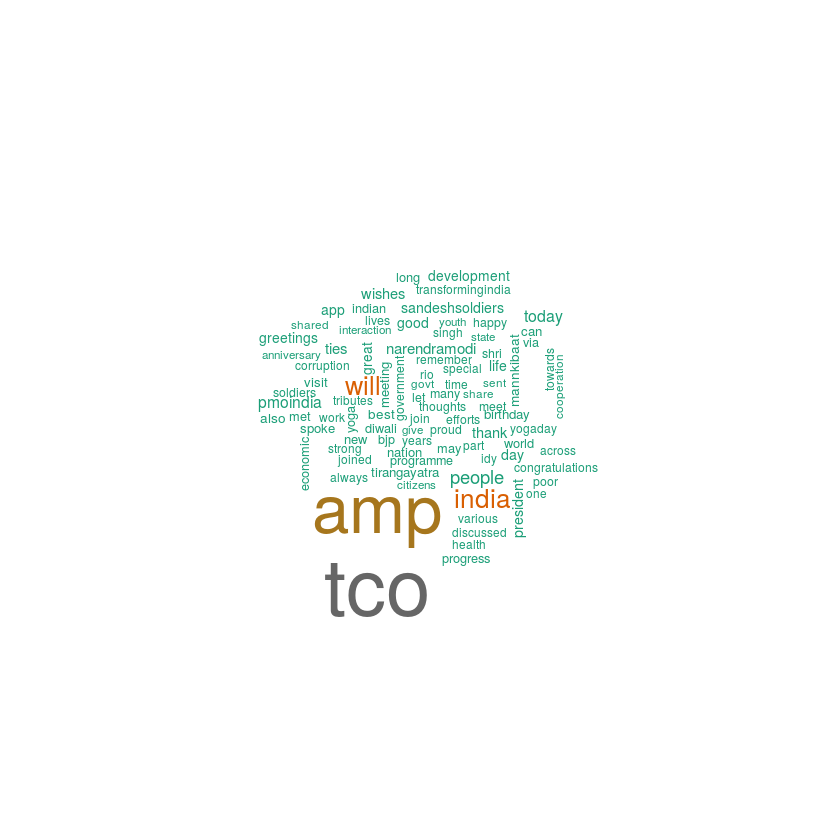

In [68]:
words_freq <- data.frame(rowSums(words))
names(words_freq) = 'count'
words_freq$words <- rownames(words_freq)
words_freq <- words_freq %>% arrange(-count)
topwords <- head(words_freq, 90)
wordcloud(topwords$words, topwords$count, colors = brewer.pal(8,"Dark2"))